# 이메일 자동화 - 간단한 이메일

* smtplib는 메일 정보를 SMTP 형태로 보내주는 라이브러리
* email은 메일 발송을 필요한 정보를 편리하게 사용할 수 있게 해주는  라이브러리입니다. 

In [1]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.utils import formatdate

# g-mail 설정
* gmail를 사용하여 메일을 보내겠습니다.
* gmail의 smtp를 사용하기 위해서 보안 수준을 조정해야 합니다.(아래 주소 참조)
    - https://myaccount.google.com/lesssecureapps
    
----
* 메일 제공 업체의 smtp 정보    
    > gmail : smtp.gmail.com / 465
    
    > naver : smtp.naver.com / 465
    
    > daum  : smtp.daum.net / 465

* 아래 코드는 계정 정보를 위해서...

In [2]:
with open("./mypass.txt", "r") as f:
    for x in f:
        id_, pass_, to_ = x.split(",")

FileNotFoundError: [Errno 2] No such file or directory: './mypass.txt'

In [3]:
smtp = smtplib.SMTP_SSL("smtp.gmail.com", 465) 
smtp.login(id_, pass_)

(235, b'2.7.0 Accepted')

## 메일 내용 설정

In [4]:
email_from = id_
email_to = to_
email_date = formatdate(localtime=True)
email_subject = "2019년 8월말 온라인 펀드 판매 현황"


In [5]:
email_message_html = """안녕하세요. <br>

<h1> 이번 달 온라인 펀드 판매 현황을 보고서를 첨부합니다. </h1>

<p><span style="font-weight:bold">감사합니다.</span> </p>

"""

* MIMEMultipart는 이메일 전송에 필요한 정보를 담고 있습니다.
* MIMEText는 텍스트 내용을 첨부하기 위해서 사용합니다. 
----
* MIME(Multipurpose Internet Mail Extensions) : 이메일 표준 형식 

* MIMEMultipart를 사용하여 msg 클래스 변수를 생성 
* alternative는 MIMEMultipart의 타입을 의미 
    > 첨부파일이 포함되는 메일이라면 mixed로 설정(기본값)

In [6]:
msg = MIMEMultipart('mixed')

# 보내는 사람 
msg['From'] = email_from

# 받는 사람 
msg['To'] = email_to

# 날짜
msg['Date'] = email_date

# 제목
msg['Subject'] = email_subject


* MIMEText를 사용하여 내용 문자열을 MIMEText 클래스 변수 형태로 반환
* html 형식으로 보낼 경우 본문 내용을 html 형태로 작성해야 합니다.

In [7]:
# 본문 추가 (html형식으로 인코딩 방식은 utf-8)
msg.attach(MIMEText(email_message_html, "html", _charset="utf-8"))
#msg.attach(MIMEText(email_message))

## 첨부파일 보내기

In [8]:
from email.mime.application import MIMEApplication
from email.mime.base import MIMEBase
from email.encoders import encode_base64
from email.header import Header

* encode_base64는 encode를 6비트(2^6) 64개의 문자로 변환합니다.
* MIMEBase에서 파일 전송 형태는 아래 주소에서 확인할 수 있습니다.
    - https://www.iana.org/assignments/media-types/media-types.xhtml#application

In [9]:
# 실제 파일 경로를 open함수로 read 한다.
filename = "fund_result.docx"
target_file = "./" + filename
with open(target_file, "rb") as attach_file:
    # application, octet-stream은 모든 종류의 파일을 전송할 때 사용하는 타입 
    file_data = MIMEBase("application", "octet-stream")
    file_data.set_payload(attach_file.read())
    encode_base64(file_data)
    # add_header에 filename를 전달해야 첨부된 파일명이 보입니다. 
    file_data.add_header('Content-Disposition', 'attachment', filename=filename)
    msg.attach(file_data)

## 메일 보내기
* sendmail() 메소드를 사용해서 메일을 발송합니다. 
* sendmail()의 보내는 사람, 받는 사람, 본문 내용 순서로 전달합니다. 
* MIMEMultipart에서 설정한 보내는 사람, 받는 사람은 이메일이 아니라 이름을 의미합니다. 
* 여러 명에서 이메일을 전송하고 싶다면 아래 to_ 부분을 메일 목록을 리스트로 작성하여 전달합면 됩니다.

In [10]:
smtp.sendmail(id_,to_, msg.as_string())

{}

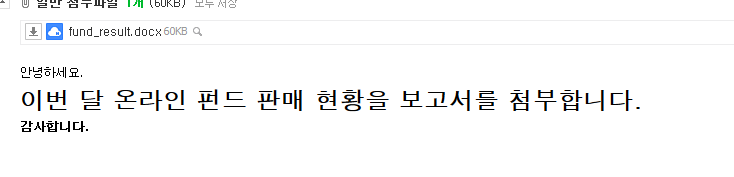